PoC - Proof of Concept

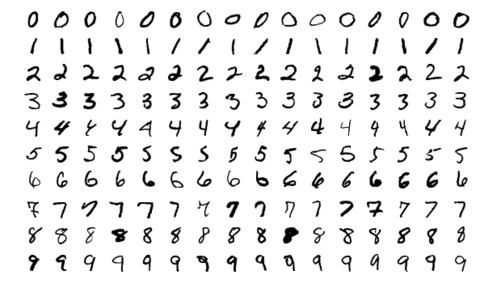

#MNIST Dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full[0].shape

(28, 28)

In [6]:
y_train_full.shape

(60000,)

In [7]:
y_train_full[0]

5

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [10]:
img = X_train_full[0]
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

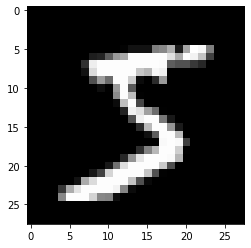

In [11]:
plt.imshow(img, cmap="gray")

In [12]:
label = y_train_full[0]
label

5

1. *0 -> 255* => More computation time, and Search space is large for finding solution.

2. *0 -> 1* => Less computation time, and Search space is small for finding solution.


In [14]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255 

In [15]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [16]:
len(np.unique(y_train))

10

In [17]:
CLASSES = len(np.unique(y_train))
CLASSES

10

In [18]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28, 28), name="inputLayer"), # 784
    tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer01"), # 300
    tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer02"), # 100
    tf.keras.layers.Dense(CLASSES, activation="softmax", name="outputLayer"), # 10
]

In [19]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [20]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZERS, metrics=METRICS)

In [22]:
Early_Stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights='True',
    min_delta=0.1
)

In [23]:
EPOCHS = 30

VALIDATION = (X_valid, y_valid)

history = model_clf.fit(
    X_train,
    y_train,
    epochs = EPOCHS,
    batch_size=32,
    callbacks = [Early_Stopping],
    validation_data = VALIDATION
)

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6265 - accuracy: 0.8384 - val_loss: 0.3048 - val_accuracy: 0.9128
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2870 - accuracy: 0.9183 - val_loss: 0.2389 - val_accuracy: 0.9312
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2334 - accuracy: 0.9334 - val_loss: 0.2024 - val_accuracy: 0.9452
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1987 - accuracy: 0.9432 - val_loss: 0.1760 - val_accuracy: 0.9516
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1735 - accuracy: 0.9499 - val_loss: 0.1575 - val_accuracy: 0.9552
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1536 - accuracy: 0.9558 - val_loss: 0.1444 - val_accuracy: 0.9608
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1384 - accuracy: 0.9604 - val_loss: 0.1311 - val_acc

In [24]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.626526,0.838418,0.304817,0.9128
1,0.287039,0.918345,0.238851,0.9312
2,0.233358,0.933400,0.202359,0.9452
3,0.198719,0.943182,0.175955,0.9516
4,0.173509,0.949927,0.157484,0.9552
5,0.153593,0.955782,0.144412,0.9608
6,0.138351,0.960382,0.131074,0.9632
7,0.125229,0.963855,0.123620,0.9678
8,0.114116,0.967564,0.116066,0.9680
9,0.104842,0.970745,0.110936,0.9700


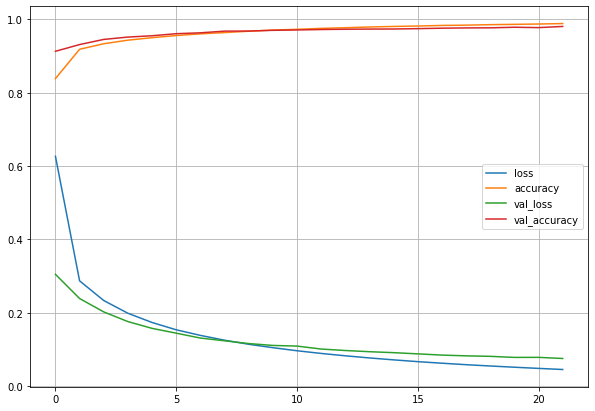

In [25]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [26]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1023 - accuracy: 0.9695


[0.10230150073766708, 0.9695000052452087]

In [27]:
model_clf.save("mnist_full.h5")

In [28]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 185ms/step


array([[0.   , 0.   , 0.001, 0.002, 0.   , 0.   , 0.   , 0.997, 0.   ,
        0.   ],
       [0.   , 0.   , 0.999, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.99 , 0.002, 0.001, 0.   , 0.   , 0.001, 0.004, 0.001,
        0.   ]], dtype=float32)

In [29]:
X_new.shape

(3, 28, 28)

In [30]:
y_prob.shape

(3, 10)

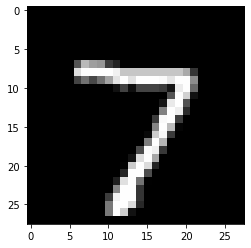

In [31]:
plt.imshow(X_new[0], cmap="gray")

In [33]:
Y_pred = np.argmax(y_prob, axis=1)
Y_pred

array([7, 2, 1], dtype=int64)

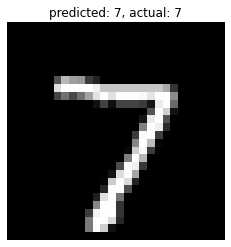

------------------------------------------------------------


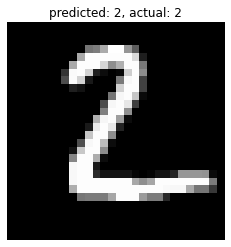

------------------------------------------------------------


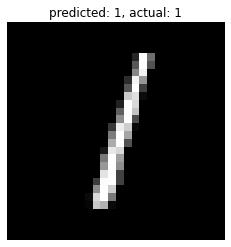

------------------------------------------------------------


In [34]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

In [35]:
y_train.shape

(55000,)

In [36]:
y_train[1]

3

# Transfer learning

## New problem statement - 
Classify handwritten digits into odd and even

In [37]:
pretrained_model = tf.keras.models.load_model("mnist_full.h5")

In [38]:
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [39]:
for layer in pretrained_model.layers:
    print(f"{layer.name}: {layer.trainable}")

inputLayer: True
hiddenLayer01: True
hiddenLayer02: True
outputLayer: True


In [40]:
for layer in pretrained_model.layers[:-1]: # leave the last layer
    layer.trainable = False

In [41]:
for layer in pretrained_model.layers:
    print(f"{layer.name}: {layer.trainable}")

inputLayer: False
hiddenLayer01: False
hiddenLayer02: False
outputLayer: True


In [42]:
lower_pretrained_model = pretrained_model.layers[:-1]

In [43]:
new_model = tf.keras.models.Sequential(lower_pretrained_model)
new_model.add(
    tf.keras.layers.Dense(2, activation="softmax")
)

In [44]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 265,802
Trainable params: 202
Non-trainable params: 265,600
_________________________________________________________________


In [45]:
def update_even_odd_labels(labels):
    for idx, label in enumerate(labels):
        labels[idx] = np.where(label%2 == 0, 1, 0) # 1 -> even, 0 -> odd
    return labels

In [46]:
ex_1 = np.array([1,2,3,4,5])
ex_1

array([1, 2, 3, 4, 5])

In [47]:
for idx, label in enumerate(ex_1):
    # print(idx, label)
    print(ex_1[idx], np.where(label%2 == 0, 1, 0))

1 0
2 1
3 0
4 1
5 0


In [48]:
y_train_bin, y_test_bin, y_valid_bin = update_even_odd_labels([y_train, y_test, y_valid])

In [49]:
np.unique(y_train_bin)

array([0, 1])

In [50]:
new_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="SGD",
                  metrics=["accuracy"]
                  )

In [51]:
history = new_model.fit(
    X_train, y_train_bin, epochs=10, validation_data = (X_valid, y_valid_bin),callbacks = [Early_Stopping]
)

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 0.1990 - accuracy: 0.9267 - val_loss: 0.1367 - val_accuracy: 0.9548
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1348 - accuracy: 0.9532 - val_loss: 0.1228 - val_accuracy: 0.9582
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1247 - accuracy: 0.9564 - val_loss: 0.1172 - val_accuracy: 0.9606
Epoch 4/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1193 - accuracy: 0.9591 - val_loss: 0.1135 - val_accuracy: 0.9628
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1156 - accuracy: 0.9596 - val_loss: 0.1103 - val_accuracy: 0.9618
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1127 - accuracy: 0.9609 - val_loss: 0.1079 - val_accuracy: 0.9648
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1106 - accuracy: 0.9615 - val_loss: 0.1062 - val_accuracy

In [52]:
new_model.evaluate(X_test, y_test_bin)

313/313 [==============================] - 1s 5ms/step - loss: 0.1071 - accuracy: 0.9621


[0.10707113891839981, 0.9621000289916992]

In [53]:
X_new = X_test[:3]

y_prob = new_model.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 161ms/step


array([[0.997, 0.003],
       [0.001, 0.999],
       [0.978, 0.022]], dtype=float32)

In [54]:
Y_pred = np.argmax(y_prob, axis=1)
Y_pred

array([0, 1, 0], dtype=int64)

In [55]:
y_test_bin[:3]

array([0, 1, 0])

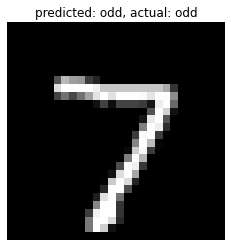

------------------------------------------------------------


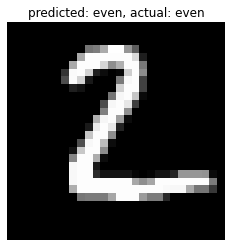

------------------------------------------------------------


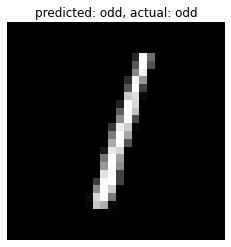

------------------------------------------------------------


In [56]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test_bin[:3]):
    if pred == 1:
        pred = "even"
    else:
        pred = "odd"

    if actual == 1:
        actual = "even"
    else:
        actual = "odd"
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

# Train A CNN model on MNIST data

In [57]:
X_train[0].shape

(28, 28)

In [59]:
X_train.shape

(55000, 28, 28)

In [58]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [60]:
np.expand_dims(X_train, -1).shape

(55000, 28, 28, 1)

In [61]:
np.expand_dims(X_train, -2).shape

(55000, 28, 1, 28)

In [62]:
np.expand_dims(X_train, -3).shape

(55000, 1, 28, 28)

In [63]:
np.expand_dims(X_train, 1).shape

(55000, 1, 28, 28)

In [64]:
np.expand_dims(X_train, 3).shape

(55000, 28, 28, 1)

In [65]:
X_train_CNN = np.expand_dims(X_train, -1)
X_test_CNN = np.expand_dims(X_test, -1)
X_valid_CNN = np.expand_dims(X_valid, -1)

In [66]:
X_train_CNN.shape

(55000, 28, 28, 1)

In [67]:
X_train_CNN[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [68]:
X_train_CNN[0].shape

(28, 28, 1)

In [69]:
input_shape = (28, 28, 1) # (row, col, channels)
CLASSES = 10
LAYERS = [
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(CLASSES, activation="softmax")
]

In [70]:
CNN_model = tf.keras.Sequential(
    LAYERS
)

In [71]:
CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [72]:
CNN_model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='SGD', 
              metrics=['accuracy'])

In [73]:
history = CNN_model.fit(
    X_train_CNN, y_train, epochs=30, 
    validation_data = (X_valid_CNN, y_valid),
    callbacks = [Early_Stopping]
)

Epoch 1/30
1719/1719 [==============================] - 71s 40ms/step - loss: 0.5588 - accuracy: 0.8413 - val_loss: 0.2133 - val_accuracy: 0.9388
Epoch 2/30
1719/1719 [==============================] - 66s 38ms/step - loss: 0.1727 - accuracy: 0.9495 - val_loss: 0.1420 - val_accuracy: 0.9582
Epoch 3/30
1719/1719 [==============================] - 67s 39ms/step - loss: 0.1226 - accuracy: 0.9633 - val_loss: 0.1065 - val_accuracy: 0.9686
Epoch 4/30
1719/1719 [==============================] - 75s 44ms/step - loss: 0.1000 - accuracy: 0.9697 - val_loss: 0.0903 - val_accuracy: 0.9750
Epoch 5/30
1719/1719 [==============================] - 69s 40ms/step - loss: 0.0863 - accuracy: 0.9744 - val_loss: 0.0814 - val_accuracy: 0.9768
Epoch 6/30
1719/1719 [==============================] - 65s 38ms/step - loss: 0.0772 - accuracy: 0.9765 - val_loss: 0.0757 - val_accuracy: 0.9762
Epoch 7/30
1719/1719 [==============================] - 68s 40ms/step - loss: 0.0705 - accuracy: 0.9791 - val_loss: 0.0686 -

In [74]:
CNN_model.evaluate(X_test_CNN, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0975 - accuracy: 0.9713


[0.09745202958583832, 0.9713000059127808]

In [75]:
CNN_model.save("CNN_model_full.h5")

In [76]:
pre_trained_CNN_model = tf.keras.models.load_model("CNN_model_full.h5")

In [77]:
for layer in pre_trained_CNN_model.layers[:-1]: # leave the last layer
    layer.trainable = False

In [78]:
lower_pretrained_CNN_model = pre_trained_CNN_model.layers[:-1]

In [79]:
new_CNN_model = tf.keras.models.Sequential(lower_pretrained_CNN_model)
new_CNN_model.add(
    tf.keras.layers.Dense(2, activation="softmax")
)

In [82]:
new_CNN_model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='SGD', 
              metrics=['accuracy'])

In [85]:
new_CNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 2)                

In [83]:
history = new_CNN_model.fit(
    X_train_CNN, y_train_bin, epochs=30, 
    validation_data = (X_valid_CNN, y_valid_bin),
    callbacks = [Early_Stopping]
)

Epoch 1/30
1719/1719 [==============================] - 24s 14ms/step - loss: 0.2071 - accuracy: 0.9302 - val_loss: 0.1076 - val_accuracy: 0.9620
Epoch 2/30
1719/1719 [==============================] - 27s 16ms/step - loss: 0.1123 - accuracy: 0.9589 - val_loss: 0.1014 - val_accuracy: 0.9642
Epoch 3/30
1719/1719 [==============================] - 22s 13ms/step - loss: 0.0990 - accuracy: 0.9649 - val_loss: 0.0944 - val_accuracy: 0.9658
Epoch 4/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.0936 - accuracy: 0.9665 - val_loss: 0.0770 - val_accuracy: 0.9742
Epoch 5/30
1719/1719 [==============================] - 20s 12ms/step - loss: 0.0886 - accuracy: 0.9687 - val_loss: 0.1125 - val_accuracy: 0.9634
Epoch 6/30
1719/1719 [==============================] - 21s 12ms/step - loss: 0.0840 - accuracy: 0.9712 - val_loss: 0.0709 - val_accuracy: 0.9768
Epoch 7/30
1719/1719 [==============================] - 22s 13ms/step - loss: 0.0812 - accuracy: 0.9714 - val_loss: 0.0714 -

In [86]:
new_CNN_model.evaluate(X_test_CNN, y_test_bin)

313/313 [==============================] - 4s 12ms/step - loss: 0.1007 - accuracy: 0.9618


[0.10068024694919586, 0.9617999792098999]

<AxesSubplot:>

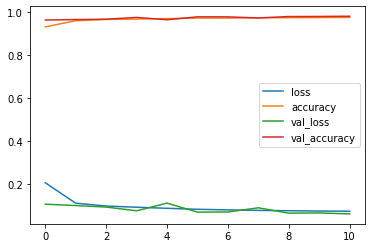

In [87]:
pd.DataFrame(history.history).plot()